In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('weather.csv')

In [4]:
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [5]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non

In [6]:
print("\nSummary statistics of the dataset:")
print(df.describe())



Summary statistics of the dataset:
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000 

<Figure size 1200x1000 with 0 Axes>

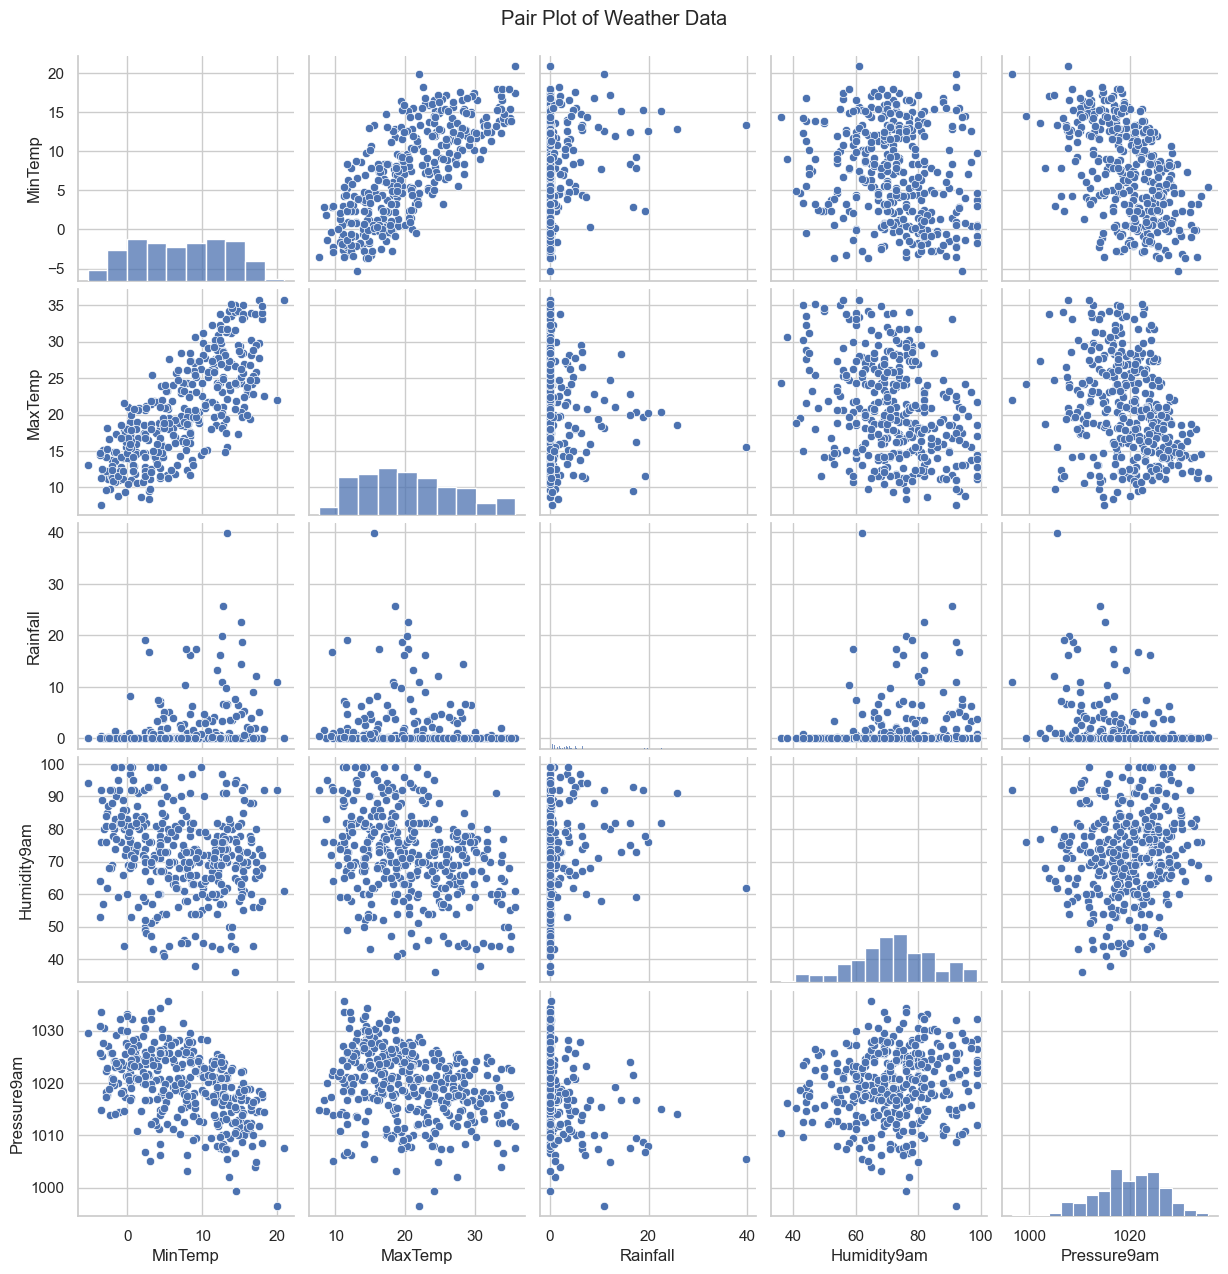

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']])
plt.suptitle("Pair Plot of Weather Data", y=1.02)
plt.show()

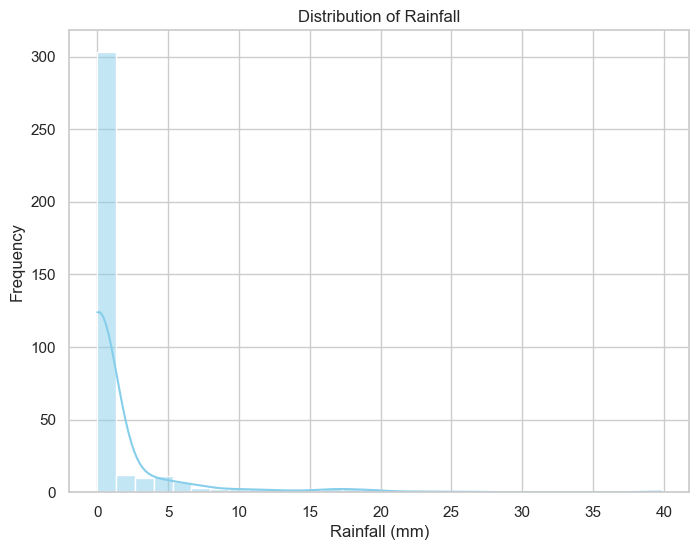

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

In [10]:
avg_max_temp = df['MaxTemp'].mean()

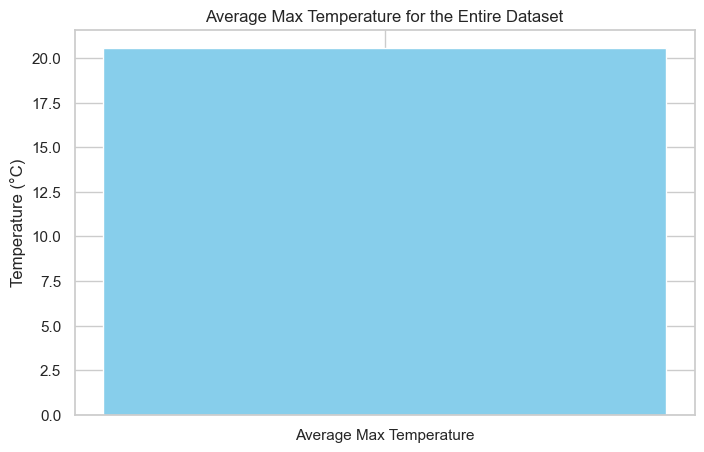

In [11]:
plt.figure(figsize=(8, 5))
plt.bar(['Average Max Temperature'], [avg_max_temp], color='skyblue')
plt.title('Average Max Temperature for the Entire Dataset')
plt.ylabel('Temperature (°C)')
plt.show()

In [12]:
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error for Rainfall Prediction: {mse:.2f}')



Mean Squared Error for Rainfall Prediction: 18.64


In [16]:
highest_rainfall_month = df['Rainfall'].idxmax()
lowest_rainfall_month = df['Rainfall'].idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 3, Lowest rainfall month: 0
